In [177]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

In [178]:
X = np.genfromtxt('edlich-kmeans-A0.csv',delimiter=',',skip_header=True)

## What is the best k?

Answer:

I used the silhouette statistic to predict the optimum number for k, which is computable with the sklear lib.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html

The silhouette coefficient ranges from -1 to 1 where -1 is the worst and 1 the best value for a given clustering model.


**In this case 6 is the best number for k since it has the highest coefficient.**

In [179]:
silhouette_avg_best = 0.0
# do the clustering with a range of n clusters
for k in range(2,9):
    kmeans  = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(X)
    # compute the silhouette_score metric so we can compare the models for k clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For k =", k, "The average silhouette_score is :", silhouette_avg)
    # save the best k cluster model based on the silhouette_score
    if silhouette_avg > silhouette_avg_best:
        silhouette_avg_best = silhouette_avg
        cluster_centers_best = kmeans.cluster_centers_
        cluster_labels_best = cluster_labels
        k_best = k
        kmeans_best = kmeans

For k = 2 The average silhouette_score is : 0.5080966482269589
For k = 3 The average silhouette_score is : 0.6226269780035212
For k = 4 The average silhouette_score is : 0.7030425884541488
For k = 5 The average silhouette_score is : 0.7784669319736822
For k = 6 The average silhouette_score is : 0.8000534808657666
For k = 7 The average silhouette_score is : 0.7082982889712669
For k = 8 The average silhouette_score is : 0.6049553897385286


In [180]:
print("The best number for k is", k_best, "with average silhouette_score: ", silhouette_avg_best )

The best number for k is 6 with average silhouette_score:  0.8000534808657666


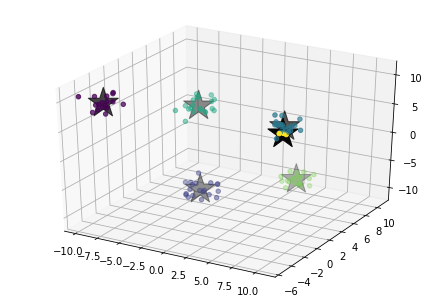

In [181]:
fig2 = plt.figure()
ax2 = Axes3D(fig2)
# plot the best clustering result
C = cluster_centers_best
ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=cluster_labels_best)
ax2.scatter(C[:, 0], C[:, 1], C[:, 2], marker="*", c='#050505', s=1000)
plt.show()

## B) Can you print the clustering vector?

In [183]:
for i, cluster_center in enumerate(kmeans_best.cluster_centers_):
    print("cluster", i, "has the coordinates", cluster_center)

cluster 0 has the coordinates [-8.53242046 -3.55401526  8.96857685]
cluster 1 has the coordinates [-2.40331671  2.14752865 -8.02378894]
cluster 2 has the coordinates [5.8824053  3.59073875 4.60507998]
cluster 3 has the coordinates [-5.10691526  5.60179825  3.71956936]
cluster 4 has the coordinates [ 3.66536804  8.91074968 -9.06579829]
cluster 5 has the coordinates [10.39919728 -3.2040623   9.16365006]


In [184]:
for i, label in enumerate(cluster_labels_best):
    print("point i=", i," belongs to cluster ", label)

point i= 0  belongs to cluster  3
point i= 1  belongs to cluster  0
point i= 2  belongs to cluster  0
point i= 3  belongs to cluster  2
point i= 4  belongs to cluster  0
point i= 5  belongs to cluster  4
point i= 6  belongs to cluster  2
point i= 7  belongs to cluster  0
point i= 8  belongs to cluster  1
point i= 9  belongs to cluster  2
point i= 10  belongs to cluster  0
point i= 11  belongs to cluster  1
point i= 12  belongs to cluster  2
point i= 13  belongs to cluster  4
point i= 14  belongs to cluster  3
point i= 15  belongs to cluster  0
point i= 16  belongs to cluster  1
point i= 17  belongs to cluster  4
point i= 18  belongs to cluster  3
point i= 19  belongs to cluster  3
point i= 20  belongs to cluster  0
point i= 21  belongs to cluster  1
point i= 22  belongs to cluster  3
point i= 23  belongs to cluster  0
point i= 24  belongs to cluster  0
point i= 25  belongs to cluster  5
point i= 26  belongs to cluster  1
point i= 27  belongs to cluster  1
point i= 28  belongs to cluste